In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
import imblearn
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.linear_model import Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.shape

(614, 13)

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df.isnull().sum().sum()

149

<function matplotlib.pyplot.show(close=None, block=None)>

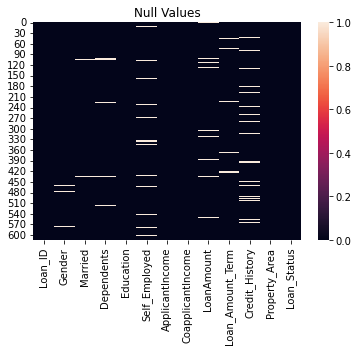

In [11]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [14]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [16]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [17]:
df.isnull().sum().sum()

0

<function matplotlib.pyplot.show(close=None, block=None)>

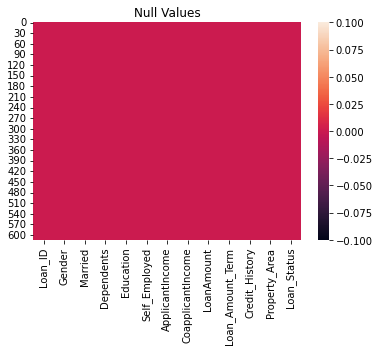

In [18]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show

In [19]:
df.loc[df['Loan_Status']==" "]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.shape

(614, 13)

In [22]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

In [23]:
df_cc=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        df_cc.append(i)
print(df_cc)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [24]:
len(df_cc)

8

In [25]:
df_nc=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        df_nc.append(i)
print(df_nc)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [26]:
len(df_nc)

5

In [27]:
len(df.dtypes.index)==len(df_nc)+len(df_cc)

True

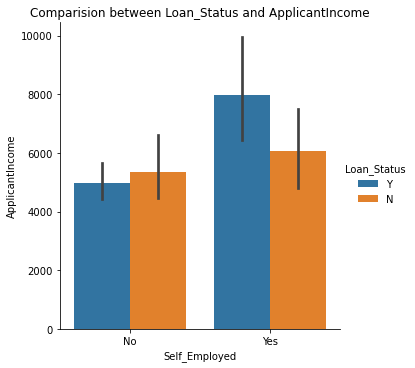

In [28]:
sns.catplot(x='Self_Employed',y='ApplicantIncome',data=df,kind='bar',hue='Loan_Status')
plt.title("Comparision between Loan_Status and ApplicantIncome")
plt.show()

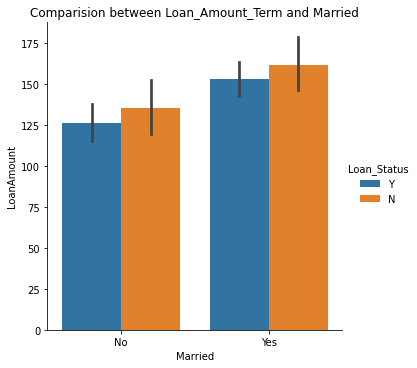

In [29]:
sns.catplot(x='Married',y="LoanAmount",data=df,kind='bar',hue="Loan_Status")
plt.title("Comparision between Loan_Amount_Term and Married")
plt.show()

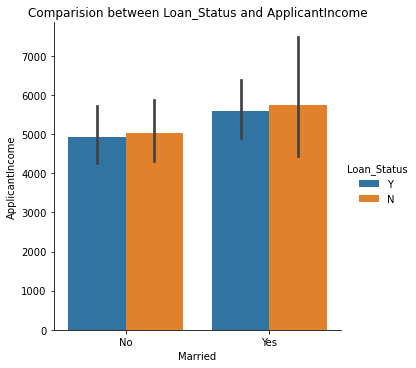

In [30]:
sns.catplot(x='Married',y='ApplicantIncome',data=df,kind='bar',hue='Loan_Status')
plt.title("Comparision between Loan_Status and ApplicantIncome")
plt.show()

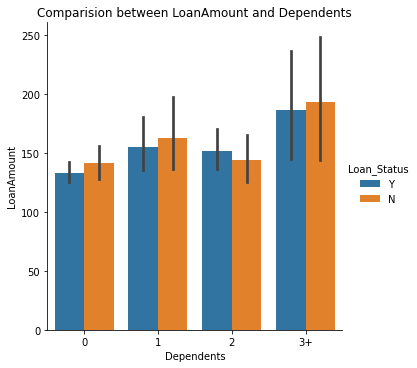

In [31]:
sns.catplot(x='Dependents',y="LoanAmount",data=df,kind='bar',hue='Loan_Status')
plt.title("Comparision between LoanAmount and Dependents")
plt.show()

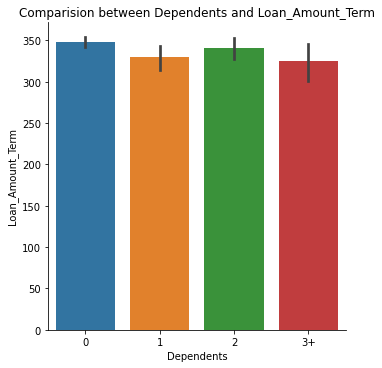

In [32]:
sns.catplot(x='Dependents',y="Loan_Amount_Term",data=df,kind='bar')
plt.title("Comparision between Dependents and Loan_Amount_Term")
plt.show()

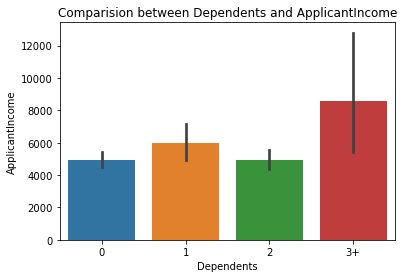

In [33]:
sns.barplot(x='Dependents',y="ApplicantIncome",data=df)
plt.title("Comparision between Dependents and ApplicantIncome")
plt.show()

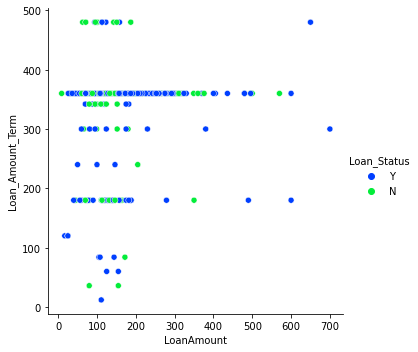

In [34]:
plt.style.use('seaborn-bright')
sns.relplot(data=df, x='LoanAmount', y='Loan_Amount_Term', hue='Loan_Status')

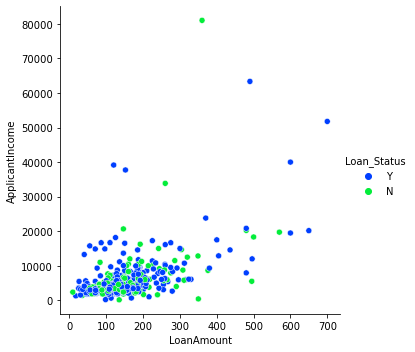

In [35]:
sns.relplot(data=df,x='LoanAmount',y='ApplicantIncome',hue='Loan_Status')

Male      502
Female    112
Name: Gender, dtype: int64


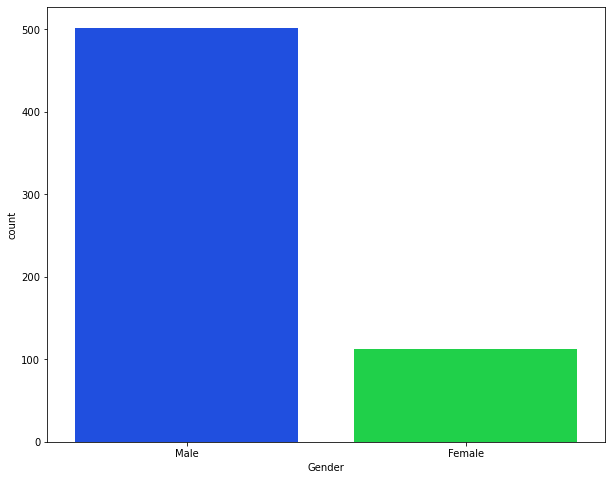

In [36]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="Gender",data=df)
print(df["Gender"].value_counts())

Yes    401
No     213
Name: Married, dtype: int64


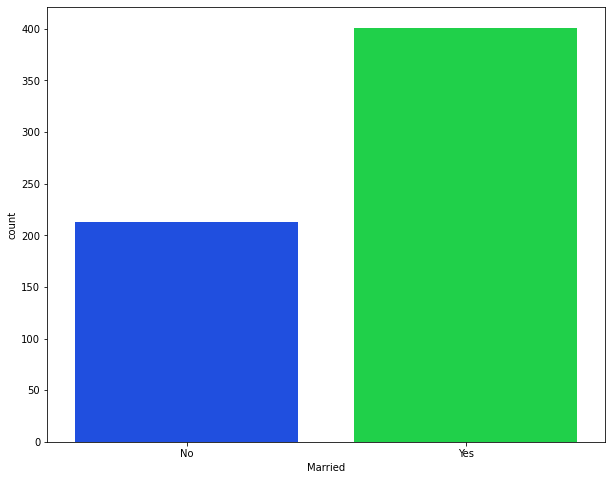

In [37]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="Married",data=df)
print(df["Married"].value_counts())

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


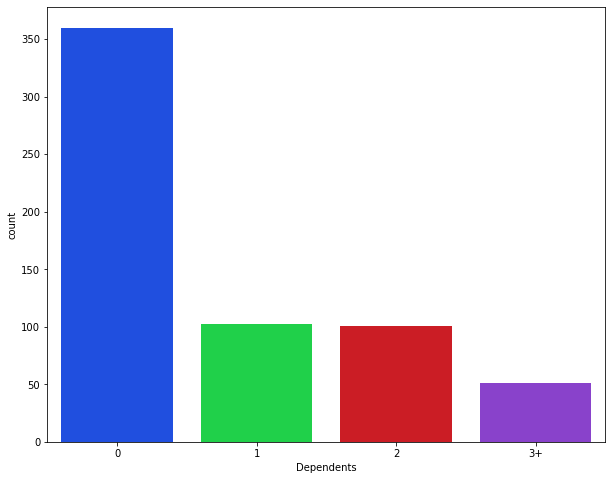

In [38]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="Dependents",data=df)
print(df["Dependents"].value_counts())

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


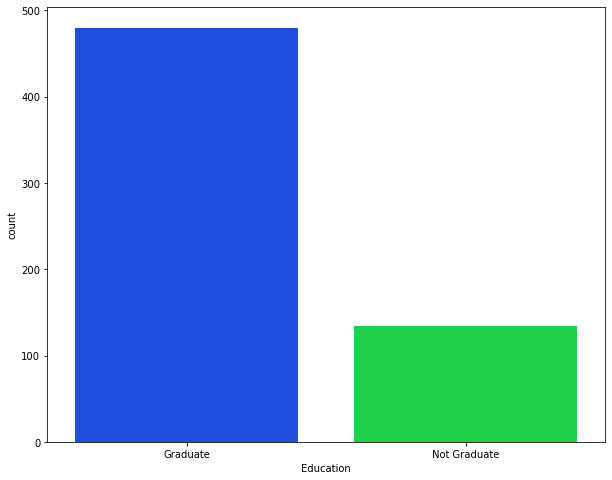

In [39]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="Education",data=df)
print(df["Education"].value_counts())

No     532
Yes     82
Name: Self_Employed, dtype: int64


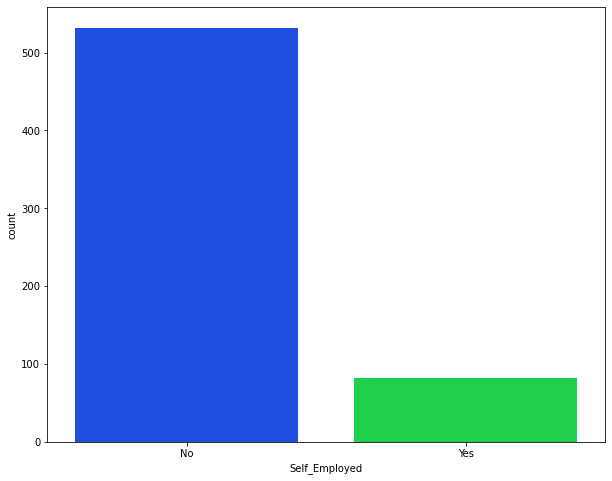

In [40]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="Self_Employed",data=df)
print(df["Self_Employed"].value_counts())

146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64


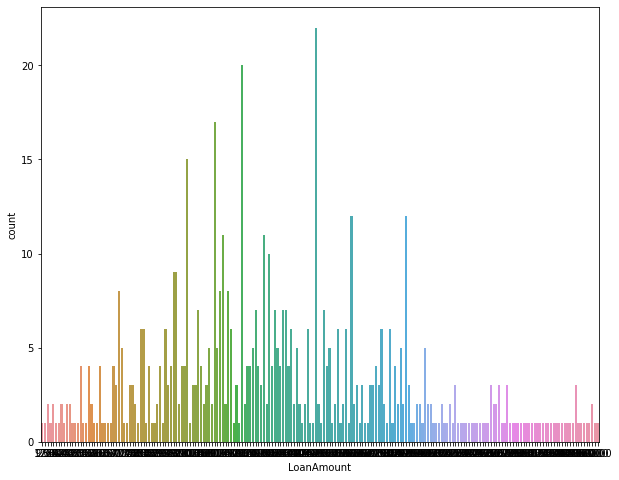

In [41]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="LoanAmount",data=df)
print(df["LoanAmount"].value_counts())

360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


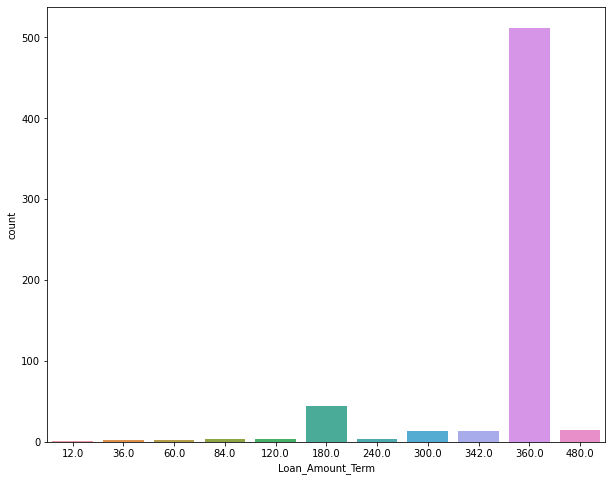

In [42]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="Loan_Amount_Term",data=df)
print(df["Loan_Amount_Term"].value_counts())

1.000000    475
0.000000     89
0.842199     50
Name: Credit_History, dtype: int64


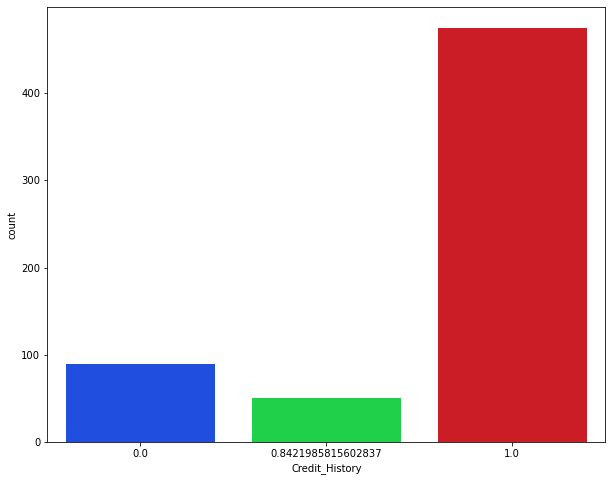

In [43]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="Credit_History",data=df)
print(df["Credit_History"].value_counts())

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


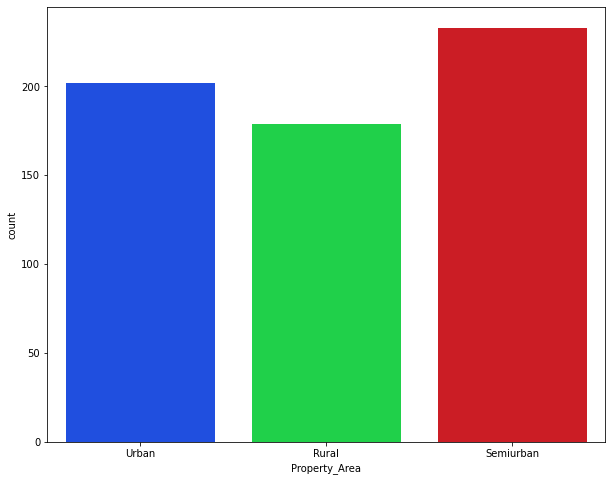

In [44]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="Property_Area",data=df)
print(df["Property_Area"].value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64


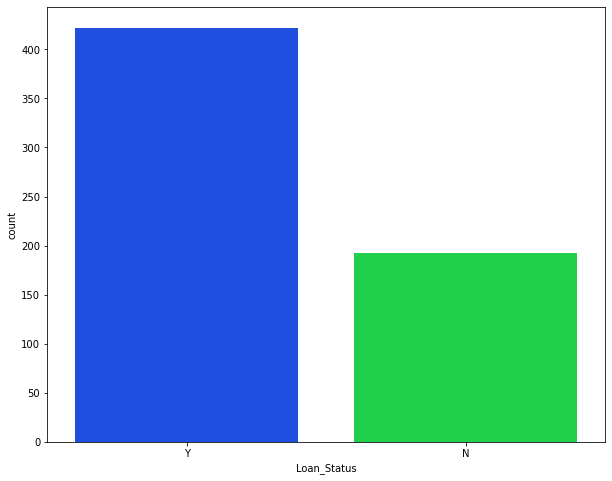

In [45]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="Loan_Status",data=df)
print(df["Loan_Status"].value_counts())

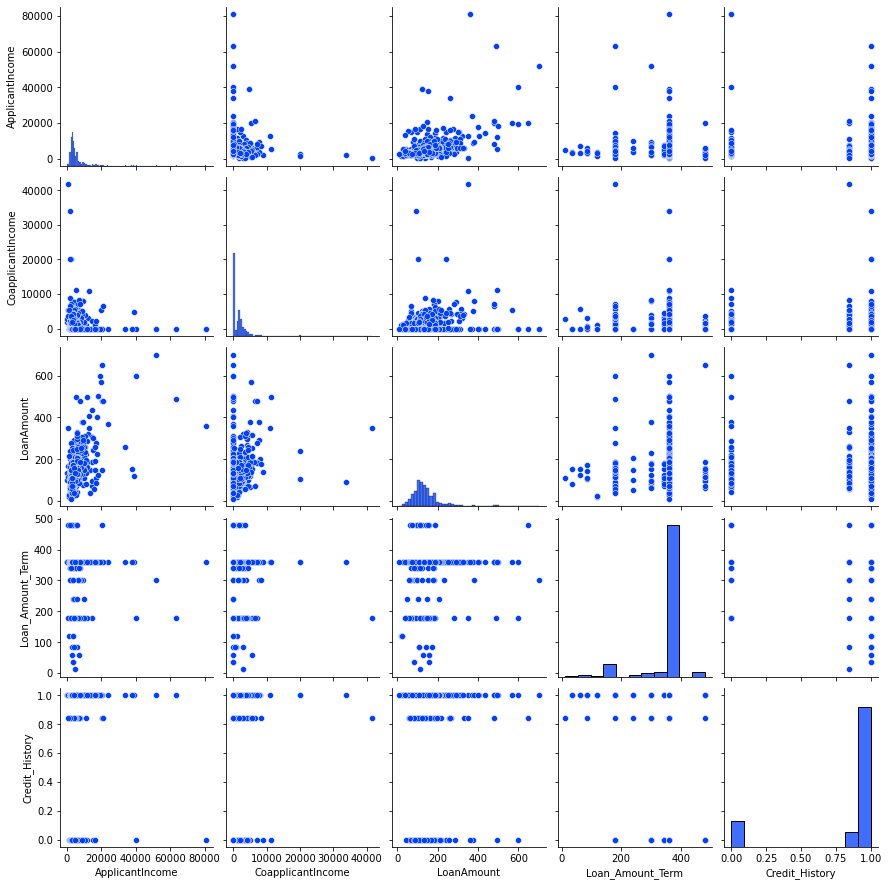

In [46]:
sns.pairplot(df)

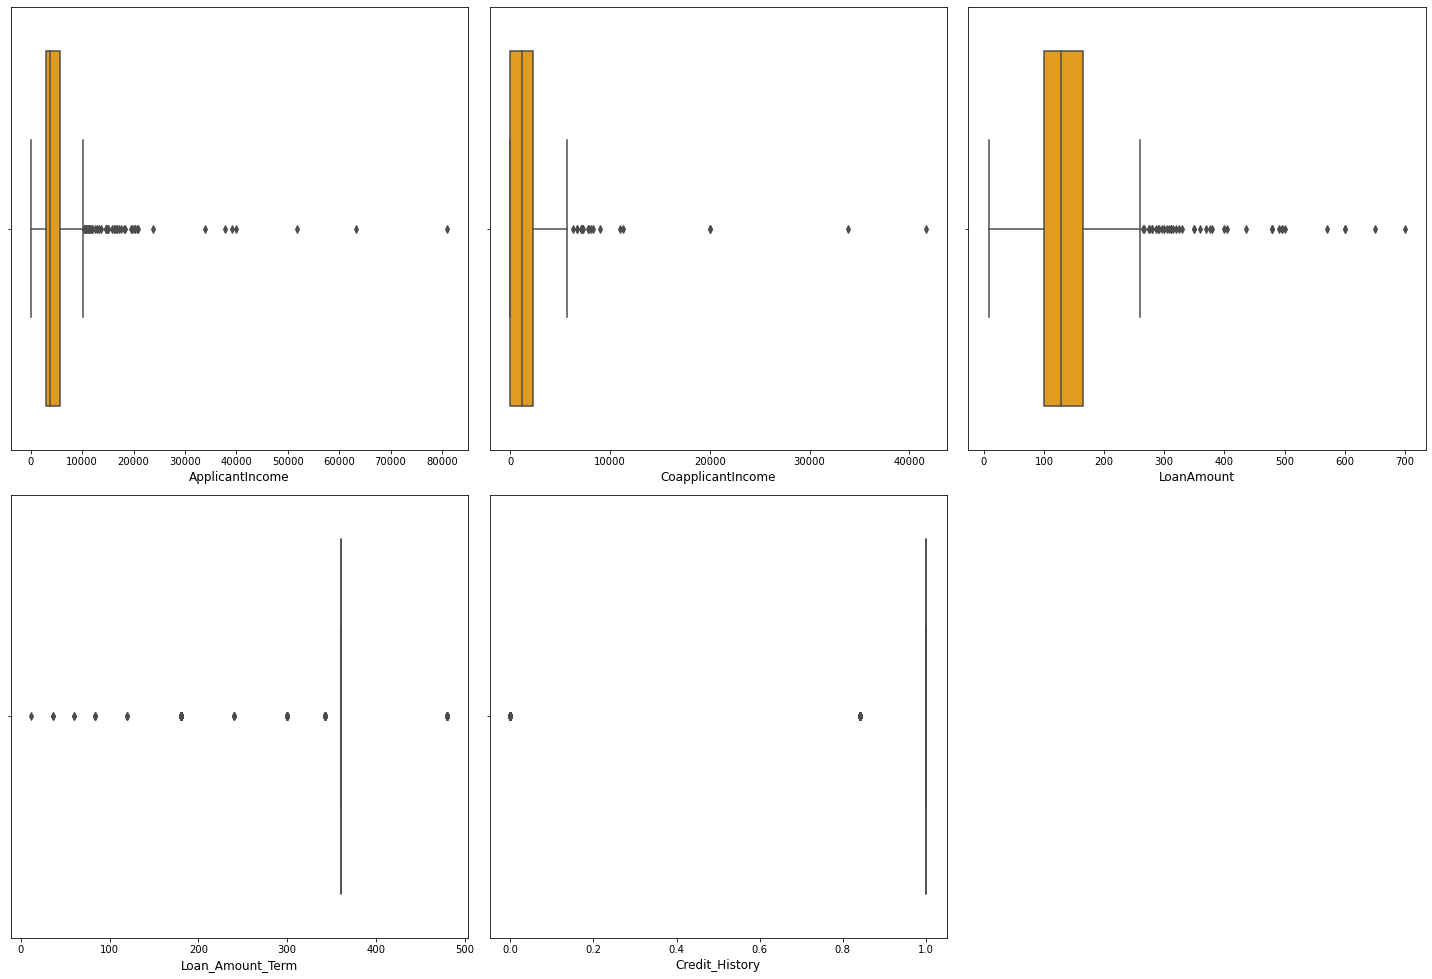

In [47]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in df_nc:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color="orange")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In [48]:
f = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]
from scipy.stats import zscore
z=np.abs(zscore(f))
z

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072991,0.554487,0.000000,0.279851,0.451640
1,0.134412,0.038732,0.219273,0.279851,0.451640
2,0.393747,0.554487,0.957641,0.279851,0.451640
3,0.462062,0.251980,0.314547,0.279851,0.451640
4,0.097728,0.554487,0.064454,0.279851,0.451640
...,...,...,...,...,...
609,0.410130,0.554487,0.898095,0.279851,0.451640
610,0.212557,0.554487,1.267279,2.518655,0.451640
611,0.437174,0.472404,1.269371,0.279851,0.451640
612,0.357064,0.554487,0.483367,0.279851,0.451640


In [49]:
df1 = df[(z<3).all(axis=1)] 
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [50]:
df.shape

(614, 13)

In [51]:
df1.shape

(577, 13)

In [52]:
Data_loss=((614-577)/614)*100
Data_loss

6.026058631921824

In [53]:
df_cc

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [54]:
le=LabelEncoder()
df1[df_cc]= df1[df_cc].apply(le.fit_transform)
df1[df_cc]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,0,1,0,0,0,0,2,1
1,1,1,1,1,0,0,0,0
2,2,1,1,0,0,1,2,1
3,3,1,1,0,1,0,2,1
4,4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...
609,572,0,0,0,0,0,0,1
610,573,1,1,3,0,0,0,1
611,574,1,1,1,0,0,2,1
612,575,1,1,2,0,0,2,1


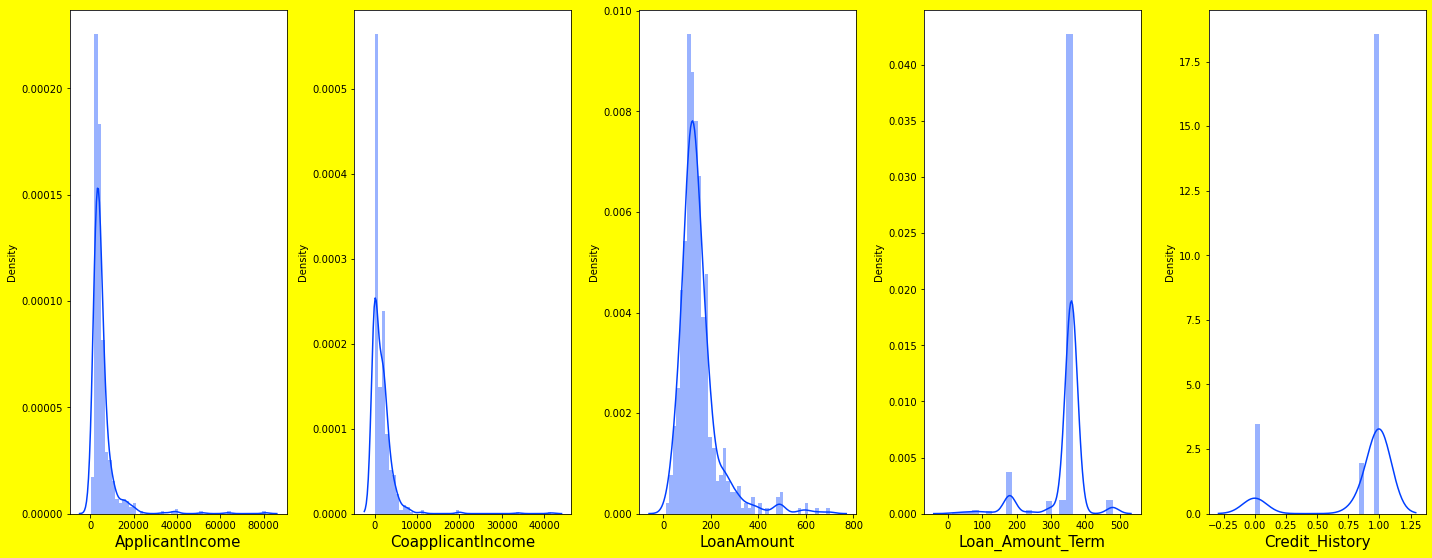

In [55]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber = 1

for column in df_nc:
    if plotnumber<=5:
        ax = plt.subplot(2,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
    
    plotnumber+=1
plt.tight_layout()

In [56]:
df1.skew()

Loan_ID              0.000000
Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [57]:
df1.skew().sort_values(ascending=False)

Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
Education            1.306588
LoanAmount           1.113132
Dependents           1.052106
Loan_ID              0.000000
Property_Area       -0.055332
Married             -0.630211
Loan_Status         -0.822635
Gender              -1.622920
Credit_History      -1.921860
Loan_Amount_Term    -2.077031
dtype: float64

In [58]:
df_nc_scaler = power_transform(df1)

In [59]:
df_nc_scaler

array([[-2.15452588,  0.47713685, -1.36251079, ...,  0.51523634,
         1.1948064 ,  0.67063309],
       [-2.12846638,  0.47713685,  0.73393914, ...,  0.51523634,
        -1.34019905, -1.49112833],
       [-2.10609441,  0.47713685,  0.73393914, ...,  0.51523634,
         1.1948064 ,  0.67063309],
       ...,
       [ 1.54503095,  0.47713685,  0.73393914, ...,  0.51523634,
         1.1948064 ,  0.67063309],
       [ 1.54965153,  0.47713685,  0.73393914, ...,  0.51523634,
         1.1948064 ,  0.67063309],
       [ 1.55426979, -2.09583477, -1.36251079, ..., -2.22500746,
         0.01546372, -1.49112833]])

In [60]:
pd.DataFrame(df_nc_scaler, columns = df1.columns).skew().sort_values(ascending=False)

Self_Employed        2.252848
Education            1.306588
Loan_Amount_Term     0.718470
Dependents           0.478360
LoanAmount           0.047692
ApplicantIncome      0.027981
Property_Area       -0.155094
CoapplicantIncome   -0.191876
Loan_ID             -0.286807
Married             -0.630211
Loan_Status         -0.822635
Credit_History      -1.588827
Gender              -1.622920
dtype: float64

In [61]:
df1=pd.DataFrame(df_nc_scaler, columns=df1.columns)

In [62]:
df1.skew().sort_values(ascending=False)

Self_Employed        2.252848
Education            1.306588
Loan_Amount_Term     0.718470
Dependents           0.478360
LoanAmount           0.047692
ApplicantIncome      0.027981
Property_Area       -0.155094
CoapplicantIncome   -0.191876
Loan_ID             -0.286807
Married             -0.630211
Loan_Status         -0.822635
Credit_History      -1.588827
Gender              -1.622920
dtype: float64

In [63]:
scaler = PowerTransformer(method='yeo-johnson')
df1[df_nc] = scaler.fit_transform(df1[df_nc].values)
df1[df_nc].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.693376,-1.114172,0.325460,0.154009,0.541657
1,0.258101,0.694668,-0.005145,0.154009,0.541657
2,-0.511665,-1.114172,-1.456119,0.154009,0.541657
3,-0.786776,0.891216,-0.159593,0.154009,0.541657
4,0.738669,-1.114172,0.231545,0.154009,0.541657


In [64]:
df1.skew().sort_values(ascending=False)

Self_Employed        2.252848
Education            1.306588
Dependents           0.478360
Loan_Amount_Term     0.390280
LoanAmount          -0.033141
CoapplicantIncome   -0.150023
Property_Area       -0.155094
ApplicantIncome     -0.246179
Loan_ID             -0.286807
Married             -0.630211
Loan_Status         -0.822635
Credit_History      -1.310557
Gender              -1.622920
dtype: float64

In [65]:
df1[['Self_Employed', 'Education', 'Married', 'Loan_Status', 'Credit_History', 'Gender']] = np.log1p(df1[['Self_Employed', 'Education', 'Married', 'Loan_Status', 'Credit_History', 'Gender']])

In [66]:
df1.skew().sort_values(ascending=False)

Self_Employed        2.252848
Education            1.306588
Dependents           0.478360
Loan_Amount_Term     0.390280
Gender               0.000000
Married              0.000000
Credit_History       0.000000
Loan_Status          0.000000
LoanAmount          -0.033141
CoapplicantIncome   -0.150023
Property_Area       -0.155094
ApplicantIncome     -0.246179
Loan_ID             -0.286807
dtype: float64

In [67]:
df1[['Self_Employed', 'Education']] = np.cbrt(df1[['Self_Employed', 'Education']])

In [68]:
df1.skew().sort_values(ascending=False)

Self_Employed        2.252848
Education            1.306588
Dependents           0.478360
Loan_Amount_Term     0.390280
Gender               0.000000
Married              0.000000
Credit_History       0.000000
Loan_Status          0.000000
LoanAmount          -0.033141
CoapplicantIncome   -0.150023
Property_Area       -0.155094
ApplicantIncome     -0.246179
Loan_ID             -0.286807
dtype: float64

In [69]:
df1=df1.drop(['Self_Employed', 'Education'],axis=1)

In [70]:
df1

,Loan_ID,Gender,Married,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,-2.154526,0.390106,NaN,-0.809243,0.693376,-1.114172,0.325460,0.154009,0.432858,1.194806,0.513203
1,-2.128466,0.390106,0.550396,0.902869,0.258101,0.694668,-0.005145,0.154009,0.432858,-1.340199,NaN
2,-2.106094,0.390106,0.550396,-0.809243,-0.511665,-1.114172,-1.456119,0.154009,0.432858,1.194806,0.513203
3,-2.085824,0.390106,0.550396,-0.809243,-0.786776,0.891216,-0.159593,0.154009,0.432858,1.194806,0.513203
4,-2.066986,0.390106,NaN,-0.809243,0.738669,-1.114172,0.231545,0.154009,0.432858,1.194806,0.513203
...,...,...,...,...,...,...,...,...,...,...,...
572,1.535783,NaN,NaN,-0.809243,-0.573900,-1.114172,-1.310567,0.154009,0.432858,-1.340199,0.513203
573,1.540408,0.390106,0.550396,1.533596,0.060349,-1.114172,-2.364634,-2.636073,0.432858,-1.340199,0.513203
574,1.545031,0.390106,0.550396,0.902869,1.264438,0.021145,1.814424,0.154009,0.432858,1.194806,0.513203
575,1.549652,0.390106,0.550396,1.344671,1.153813,-1.114172,0.961284,0.154009,0.432858,1.194806,0.513203


In [71]:
df_nc=[]
for i in df1.dtypes.index:
    if df1.dtypes[i]!='object':
        df_nc.append(i)
print(df_nc)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


In [72]:
df_cc=[]
for i in df1.dtypes.index:
    if df1.dtypes[i]!='object':
        df_cc.append(i)
print(df_cc)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


In [73]:
le=LabelEncoder()
df1[df_cc]= df1[df_cc].apply(le.fit_transform)
df1[df_cc]

,Loan_ID,Gender,Married,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,0,364,0,98,4,0,2,0
1,1,0,0,1,296,57,79,4,0,0,1
2,2,0,0,0,134,0,24,4,0,2,0
3,3,0,0,0,86,157,71,4,0,2,0
4,4,0,1,0,369,0,92,4,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
572,572,1,1,0,121,0,27,4,0,0,0
573,573,0,0,3,265,0,5,0,0,0,0
574,574,0,0,1,417,3,160,4,0,2,0
575,575,0,0,2,409,0,131,4,0,2,0


In [74]:
corr = df1.corr()
corr

,Loan_ID,Gender,Married,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,0.011887,0.013677,0.059780,0.011655,-0.050611,0.010281,-0.013134,0.036238,-0.164261,-0.023708
Gender,0.011887,1.000000,0.378997,-0.188162,-0.062560,-0.186113,-0.172230,0.101667,0.028816,0.026340,0.017408
Married,0.013677,0.378997,1.000000,-0.329900,0.020262,-0.228018,-0.183094,0.118924,-0.016144,-0.010595,0.089026
Dependents,0.059780,-0.188162,-0.329900,1.000000,0.131669,-0.067397,0.127149,-0.079437,-0.000916,0.002327,-0.017872
ApplicantIncome,0.011655,-0.062560,0.020262,0.131669,1.000000,-0.249266,0.485273,-0.037608,-0.062374,-0.049362,0.013230
CoapplicantIncome,-0.050611,-0.186113,-0.228018,-0.067397,-0.249266,1.000000,0.300720,-0.048503,0.049794,-0.101921,-0.036494
LoanAmount,0.010281,-0.172230,-0.183094,0.127149,0.485273,0.300720,1.000000,0.060227,0.006194,-0.088029,0.032171
Loan_Amount_Term,-0.013134,0.101667,0.118924,-0.079437,-0.037608,-0.048503,0.060227,1.000000,-0.028546,-0.071360,-0.013465
Credit_History,0.036238,0.028816,-0.016144,-0.000916,-0.062374,0.049794,0.006194,-0.028546,1.000000,0.015271,0.459340
Property_Area,-0.164261,0.026340,-0.010595,0.002327,-0.049362,-0.101921,-0.088029,-0.071360,0.015271,1.000000,-0.026507


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0, 0.5, 'Loan_ID'),
  Text(0, 1.5, 'Gender'),
  Text(0, 2.5, 'Married'),
  Text(0, 3.5, 'Dependents'),
  Text(0, 4.5, 'ApplicantIncome'),
  Text(0, 5.5, 'CoapplicantIncome'),
  Text(0, 6.5, 'LoanAmount'),
  Text(0, 7.5, 'Loan_Amount_Term'),
  Text(0, 8.5, 'Credit_History'),
  Text(0, 9.5, 'Property_Area'),
  Text(0, 10.5, 'Loan_Status')])

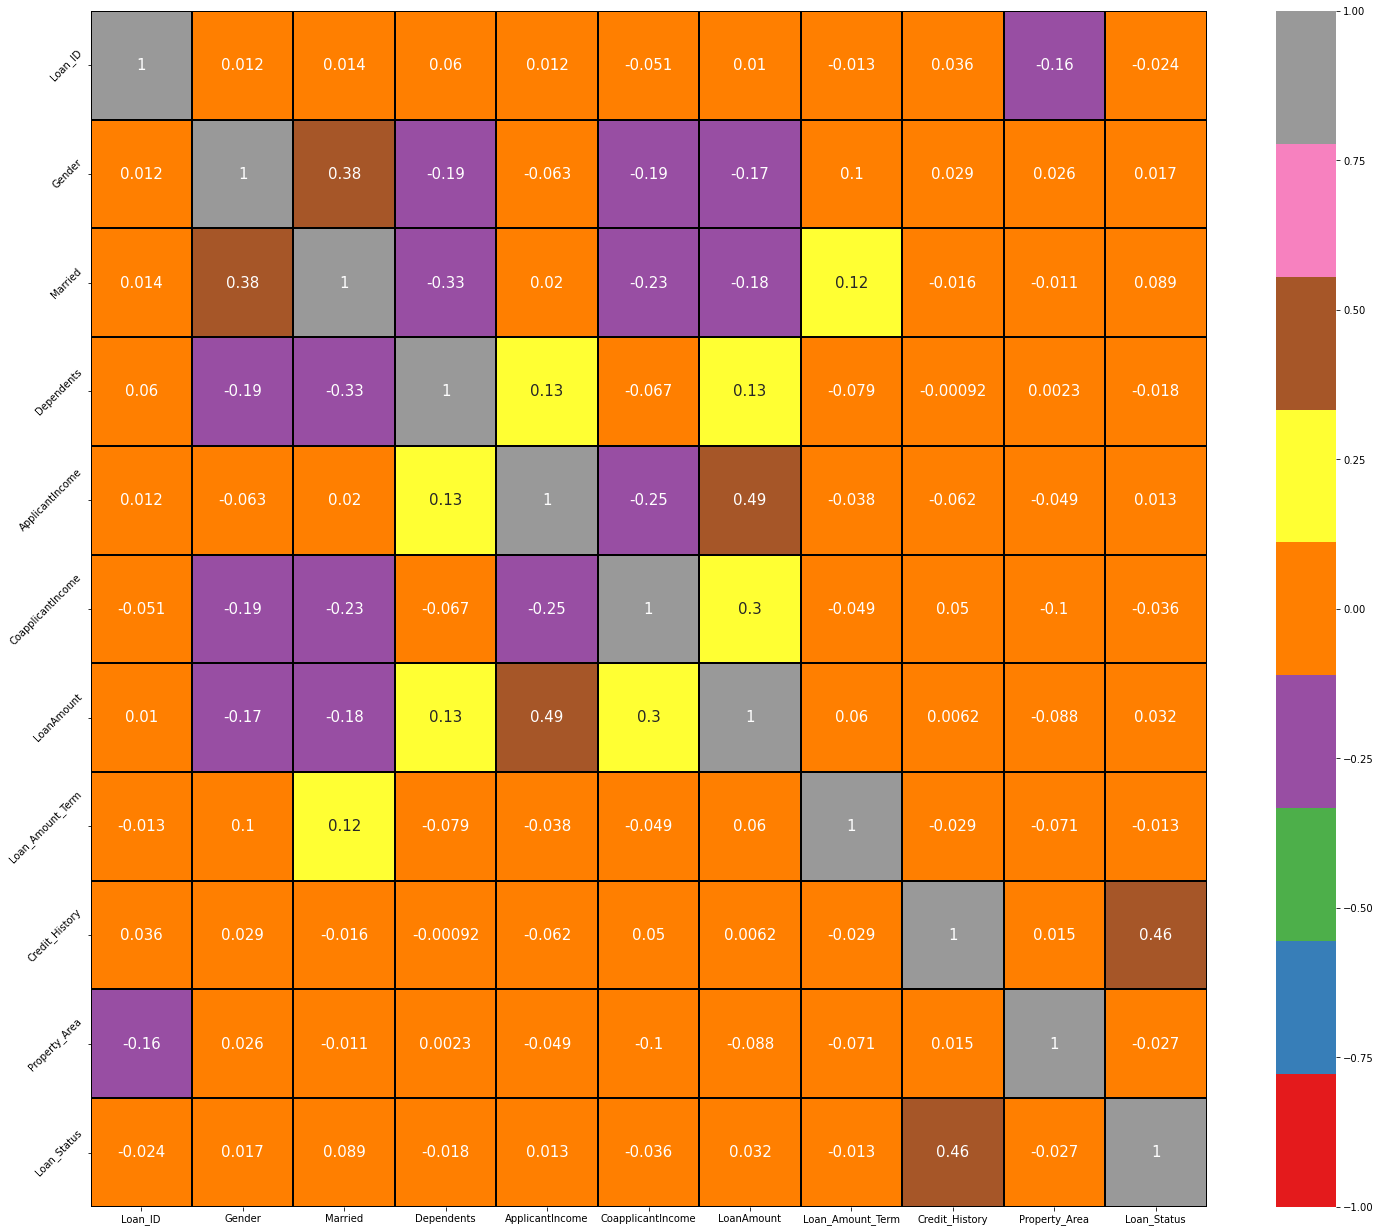

In [75]:
plt.figure(figsize=(25,22))
sns.heatmap(df1.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="Set1")
plt.yticks(rotation=45)

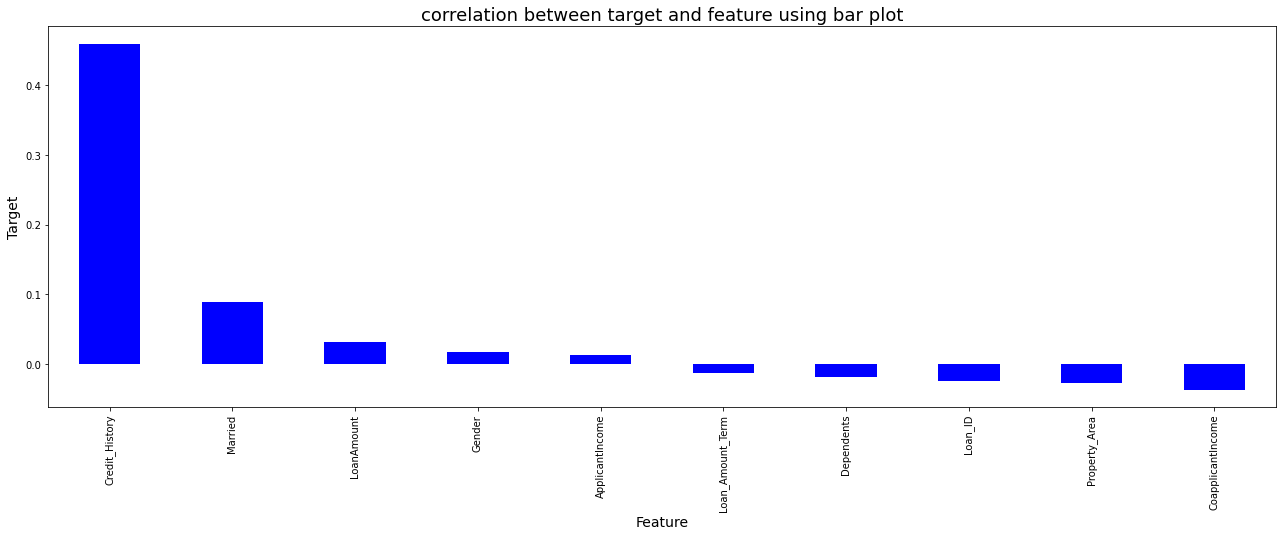

In [76]:
plt.figure(figsize=(22,7))
df1.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='blue')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('correlation between target and feature using bar plot',fontsize=18)
plt.show()

In [77]:
x = df1.drop("Loan_Status", axis=1)
y = df1["Loan_Status"]

In [78]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Loan_ID,Gender,Married,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-1.729052,-0.477137,1.362511,-0.723313,0.978084,-0.862173,0.371846,0.314995,-0.541961,1.227472
1,-1.723048,-0.477137,-0.733939,0.282353,0.473865,-0.216133,-0.084450,0.314995,-0.541961,-1.306522
2,-1.717044,-0.477137,-0.733939,-0.723313,-0.727363,-0.862173,-1.405307,0.314995,-0.541961,1.227472
3,-1.711041,-0.477137,-0.733939,-0.723313,-1.083282,0.917272,-0.276575,0.314995,-0.541961,1.227472
4,-1.705037,-0.477137,1.362511,-0.723313,1.015159,-0.862173,0.227753,0.314995,-0.541961,1.227472
...,...,...,...,...,...,...,...,...,...,...
572,1.705037,2.095835,1.362511,-0.723313,-0.823758,-0.862173,-1.333261,0.314995,-0.541961,-1.306522
573,1.711041,-0.477137,-0.733939,2.293686,0.244001,-0.862173,-1.861604,-3.320051,-0.541961,-1.306522
574,1.717044,-0.477137,-0.733939,0.282353,1.371079,-0.828171,1.860813,0.314995,-0.541961,1.227472
575,1.723048,-0.477137,-0.733939,1.288020,1.311759,-0.862173,1.164361,0.314995,-0.541961,1.227472


In [79]:
y.value_counts()

0    398
1    179
Name: Loan_Status, dtype: int64

In [80]:
sm = SMOTE()
x, y = sm.fit_resample(x,y)

In [81]:
y.value_counts()

0    398
1    398
Name: Loan_Status, dtype: int64

In [82]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.038330,Loan_ID
1,1.242356,Gender
2,1.426132,Married
3,1.197593,Dependents
4,1.734719,ApplicantIncome
5,1.592647,CoapplicantIncome
6,1.855971,LoanAmount
7,1.086497,Loan_Amount_Term
8,1.012756,Credit_History
9,1.061982,Property_Area


In [83]:
maxAcc=0
maxRS=0
for i in range(0,600):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.28,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    lrpred=lr.predict(x_test)
    acc=accuracy_score(y_test,lrpred)
    if acc>maxAcc:
        macAcc=acc
        maxRS=i
print("Best Accuracy is :",maxAcc,"on random_state:",maxRS)  

Best Accuracy is : 0 on random_state: 599


In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=599)

In [85]:
x_train

,Loan_ID,Gender,Married,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
707,0.468186,2.095835,1.362511,0.468219,-0.931972,-0.862173,0.586401,0.314995,-0.541961,1.227472
330,0.252153,-0.477137,-0.733939,-0.723313,1.133799,1.948670,1.932859,0.314995,1.845150,-0.039525
745,-1.179192,-0.477137,1.362511,-0.723313,-0.239252,0.992078,-0.156143,-3.320051,1.453159,1.227472
258,-0.180110,-0.477137,1.362511,-0.723313,-0.883077,0.271231,-0.132481,0.314995,-0.541961,-1.306522
156,-0.792482,-0.477137,-0.733939,-0.723313,1.467474,-0.862173,-1.237198,-3.320051,-0.541961,1.227472
...,...,...,...,...,...,...,...,...,...,...
765,0.563761,-0.477137,-0.733939,1.288020,0.232490,-0.719552,-0.544897,0.314995,-0.541961,1.227472
314,0.156095,-0.477137,1.362511,-0.723313,-0.786683,-0.862173,-0.804918,0.314995,-0.541961,-0.039525
682,1.049697,-0.477137,-0.733939,-0.723313,-1.007645,1.087899,0.785976,0.314995,1.845150,1.227472
93,-1.170712,-0.477137,-0.733939,-0.723313,-1.498521,-0.658160,-1.693494,0.314995,-0.541961,-0.039525


In [86]:
x_test

,Loan_ID,Gender,Married,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
42,-1.476898,-0.477137,-0.733939,-0.723313,0.555430,-0.862173,-0.852949,-0.593766,-0.541961,1.227472
162,-0.756460,-0.477137,-0.733939,-0.723313,-1.594916,0.101221,-0.876964,0.314995,-0.541961,-1.306522
108,-1.080657,-0.477137,-0.733939,-0.723313,-0.200899,1.801328,0.491924,-0.593766,1.845150,-1.306522
132,-0.936570,-0.477137,-0.733939,1.288020,0.310736,-0.295471,-0.060434,0.314995,-0.541961,-1.306522
283,-0.030018,2.095835,1.362511,-0.723313,0.703730,1.109951,0.467909,1.223757,-0.541961,-1.306522
...,...,...,...,...,...,...,...,...,...,...
791,-0.005044,-0.477137,1.362511,-0.723313,-1.447687,-0.862173,0.357178,0.314995,-0.541961,1.188780
520,1.392847,-0.477137,-0.733939,0.282353,-1.142602,0.939940,0.371846,0.314995,-0.541961,-1.306522
57,-1.386843,-0.477137,-0.733939,1.288020,-0.371443,1.268627,0.299799,0.314995,-0.541961,1.227472
125,-0.978595,-0.477137,1.362511,-0.723313,-1.476276,0.373238,-1.261214,0.314995,-0.541961,1.227472


In [87]:
y_train

707    1
330    0
745    1
258    0
156    0
      ..
765    1
314    0
682    1
93     0
241    1
Name: Loan_Status, Length: 557, dtype: int64

In [88]:
y_test

42     0
162    0
108    1
132    1
283    1
      ..
791    1
520    0
57     0
125    0
615    1
Name: Loan_Status, Length: 239, dtype: int64

In [89]:
print("x_train shape =",x_train.shape)
print("x_test shape =",x_test.shape)
print("y_train shape =",y_train.shape)
print("y_test shape =",y_test.shape)

x_train shape = (557, 10)
x_test shape = (239, 10)
y_train shape = (557,)
y_test shape = (239,)


In [90]:
lg=LogisticRegression()
gn=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()

In [91]:
model=[lg,gn,svc,dtc,knc,rfc,gbc,abc]

In [92]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of ',m,'is')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('#'*100)

Accuracy score of  LogisticRegression() is
0.6736401673640168
[[99 19]
 [59 62]]
              precision    recall  f1-score   support

           0       0.63      0.84      0.72       118
           1       0.77      0.51      0.61       121

    accuracy                           0.67       239
   macro avg       0.70      0.68      0.67       239
weighted avg       0.70      0.67      0.66       239

####################################################################################################
Accuracy score of  GaussianNB() is
0.6610878661087866
[[106  12]
 [ 69  52]]
              precision    recall  f1-score   support

           0       0.61      0.90      0.72       118
           1       0.81      0.43      0.56       121

    accuracy                           0.66       239
   macro avg       0.71      0.66      0.64       239
weighted avg       0.71      0.66      0.64       239

#######################################################################################

In [93]:
for i in range(2,10):
    print("For CV =",i)
    for m in model:
        scr=cross_val_score(m,x,y,cv=i)
        print("cross validation score of",m,"is =",scr.mean())
    print('*'*100)

For CV = 2
cross validation score of LogisticRegression() is = 0.3944723618090452
cross validation score of GaussianNB() is = 0.3894472361809045
cross validation score of SVC() is = 0.4886934673366834
cross validation score of DecisionTreeClassifier() is = 0.4170854271356784
cross validation score of KNeighborsClassifier() is = 0.5904522613065326
cross validation score of RandomForestClassifier() is = 0.4158291457286432
cross validation score of GradientBoostingClassifier() is = 0.37688442211055273
cross validation score of AdaBoostClassifier() is = 0.3517587939698492
****************************************************************************************************
For CV = 3
cross validation score of LogisticRegression() is = 0.5188915685440015
cross validation score of GaussianNB() is = 0.47244526410365534
cross validation score of SVC() is = 0.5904951056887501
cross validation score of DecisionTreeClassifier() is = 0.37184470610488485
cross validation score of KNeighborsClassifier

In [94]:
parameters={'max_features':['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':['gini','entropy']}
gcv1=GridSearchCV(RandomForestClassifier(),parameters,cv=9,scoring='accuracy')
gcv1.fit(x_train,y_train)
gcv1.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto'}

In [95]:
gcv1.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8)

In [96]:
final_model=RandomForestClassifier(max_depth=8, max_features='auto')

In [97]:
final_model.fit(x_train,y_train)
predm1=final_model.predict(x_test)
predm2=final_model.predict(x_train)


print("Test Accuracy=",final_model.score(x_test,y_test))
print("Train Accuracy=",final_model.score(x_train,y_train))

print(confusion_matrix(y_test,predm))
print(classification_report(y_test,predm))

Test Accuracy= 0.7615062761506276
Train Accuracy= 0.9317773788150808
[[96 22]
 [44 77]]
              precision    recall  f1-score   support

           0       0.69      0.81      0.74       118
           1       0.78      0.64      0.70       121

    accuracy                           0.72       239
   macro avg       0.73      0.72      0.72       239
weighted avg       0.73      0.72      0.72       239



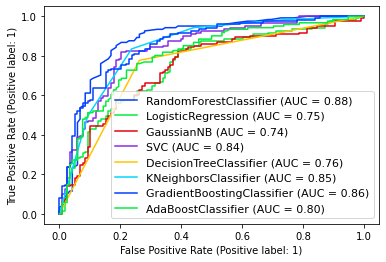

In [98]:
disp = plot_roc_curve(rfc,x_test,y_test)
plot_roc_curve(lg, x_test, y_test, ax=disp.ax_)     
plot_roc_curve(gn, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(dtc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(knc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(gbc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(abc, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

In [99]:
joblib.dump(model,"Loan Application Status Prediction.pkl")

['Loan Application Status Prediction.pkl']